# Homework 4: Statistics in Python

** Submit this notebook to bCourses to receive a credit for this assignment.**

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook name_HW04.ipynb.

# Problem 1: An error walks into a bar...

1a) For this problem you will need some kind of measuring tool (if you do not have one you may gather and share data with a classmate, but be sure to mention in your answer who you shared with). Measure the lengths and the widths of your phone, your computer (keyboard and screen separately), your pillow, then finally your bed. Repeat these measurments multiple times to get some idea of the random error introduced in your measurements. Record all your measurments in the cell below and print your final results with their corresponding error.

In [2]:
import numpy as np
# Phone
phone_length = [14.3, 14.4, 14.3]
phone_width = [7.1, 7.0, 7.1]
# Computer Keyboard
keyboard_length = [45.2, 45.1, 45.2]
keyboard_width = [15.3, 15.3, 15.2]
# Computer Screen
screen_length = [50.5, 50.5, 50.4]
screen_width = [28.2, 28.1, 28.2]
# Pillow
pillow_length = [60.0, 60.1, 60.0]
pillow_width = [40.0, 40.1, 40.0]
# Bed
bed_length = [200.0, 199.8, 200.1]
bed_width = [150.0, 149.9, 150.1]

def calc_average_error(measurements): # Function to calculate average and error
    mean = np.mean(measurements)
    error = np.std(measurements, ddof=1)  
    return mean, error

# Calculating averages and errors
phone_length_avg, phone_length_err = calc_average_error(phone_length)
phone_width_avg, phone_width_err = calc_average_error(phone_width)

keyboard_length_avg, keyboard_length_err = calc_average_error(keyboard_length)
keyboard_width_avg, keyboard_width_err = calc_average_error(keyboard_width)

screen_length_avg, screen_length_err = calc_average_error(screen_length)
screen_width_avg, screen_width_err = calc_average_error(screen_width)

pillow_length_avg, pillow_length_err = calc_average_error(pillow_length)
pillow_width_avg, pillow_width_err = calc_average_error(pillow_width)

bed_length_avg, bed_length_err = calc_average_error(bed_length)
bed_width_avg, bed_width_err = calc_average_error(bed_width)
# Printing final results with errors
print(f"Phone: {phone_length_avg:.1f} +/- {phone_length_err:.1f} cm (length), {phone_width_avg:.1f} +/- {phone_width_err:.1f} cm (width)")
print(f"Keyboard: {keyboard_length_avg:.1f} +/- {keyboard_length_err:.1f} cm (length), {keyboard_width_avg:.1f} +/- {keyboard_width_err:.1f} cm (width)")
print(f"Screen: {screen_length_avg:.1f} +/- {screen_length_err:.1f} cm (length), {screen_width_avg:.1f} +/- {screen_width_err:.1f} cm (width)")
print(f"Pillow: {pillow_length_avg:.1f} +/- {pillow_length_err:.1f} cm (length), {pillow_width_avg:.1f} +/- {pillow_width_err:.1f} cm (width)")
print(f"Bed: {bed_length_avg:.1f} +/- {bed_length_err:.1f} cm (length), {bed_width_avg:.1f} +/- {bed_width_err:.1f} cm (width)")


Phone: 14.3 +/- 0.1 cm (length), 7.1 +/- 0.1 cm (width)
Keyboard: 45.2 +/- 0.1 cm (length), 15.3 +/- 0.1 cm (width)
Screen: 50.5 +/- 0.1 cm (length), 28.2 +/- 0.1 cm (width)
Pillow: 60.0 +/- 0.1 cm (length), 40.0 +/- 0.1 cm (width)
Bed: 200.0 +/- 0.2 cm (length), 150.0 +/- 0.1 cm (width)


1b) Create three scatter plots of your measurements; length vs width, area vs length, and area vs width. Every point on these plots should have proper error bars and the plots should (as usual) be properly labeled.

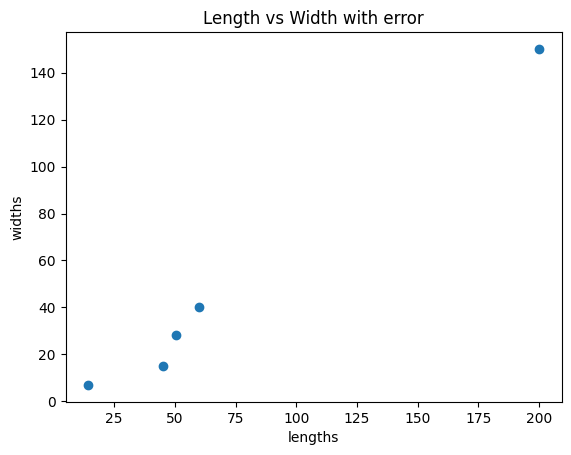

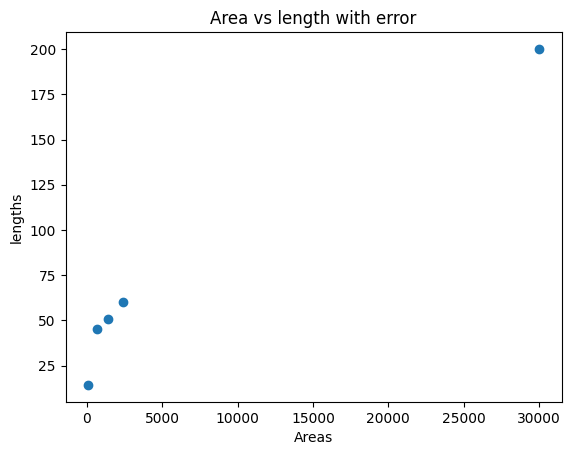

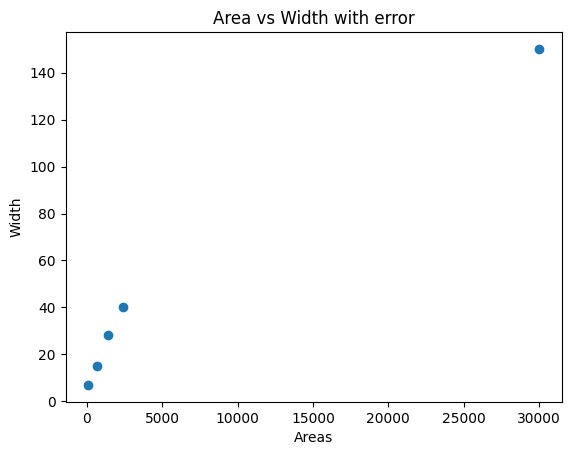

In [31]:
import matplotlib.pyplot as plt
length = [phone_length_avg,keyboard_length_avg,screen_length_avg,pillow_length_avg,bed_length_avg]
length_err = [phone_length_err,keyboard_length_err,screen_length_err,pillow_length_err,bed_length_err]
width = [phone_width_avg,keyboard_width_avg,screen_width_avg,pillow_width_avg,bed_width_avg]
width_err = [phone_width_err,keyboard_width_err,screen_width_err,pillow_width_err,bed_width_err]

plt.figure()
plt.errorbar(length,width,yerr = width_err,xerr=length_err, fmt = 'o') #error is not significant enough to show up on plot
plt.xlabel('lengths')
plt.ylabel('widths')
plt.title("Length vs Width with error")
plt.show()

plt.figure()
plt.errorbar(np.array(length)*np.array(width),length,yerr = length_err,xerr=np.array(length_err)*np.array(width_err), fmt = 'o') #error is not significant enough to show up on plot
plt.xlabel('Areas')
plt.ylabel('lengths')
plt.title("Area vs length with error")
plt.show()

plt.figure()
plt.errorbar(np.array(length)*np.array(width),width,yerr = width_err,xerr=np.array(length_err)*np.array(width_err), fmt = 'o') #error is not significant enough to show up on plot
plt.xlabel('Areas')
plt.ylabel('Width')
plt.title("Area vs Width with error")
plt.show()

# Problem 2: The Central Limit Theorem

2a) Write a function that returns $n$ integer random numbers, uniformly disributed between 1 and 6, inclusively. This represents $n$ throws of a fair 6-sided die.

In [3]:
def dice_throw(n):
    return np.random.randint(1, 7, size=n)#utilize randint from numpy which basically does the function for you

2b) Generate a distribution of 1000 dice throws and plot it as a  histogram normalized to unit area. Compute the mean $\mu_1$ and standard deviation $\sigma_1$ of this distribution. Compare your numerical result to the analytical calculation.

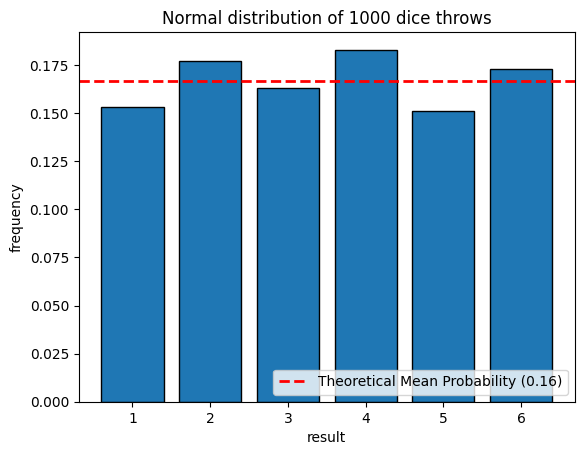

mean: 3.521
Standard deviation: 1.692


In [4]:
import matplotlib.pyplot as plt
n = 1000
rolls = dice_throw(n)#get the distribution

plt.figure()#create plot
plt.hist(rolls, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5],density = True, rwidth=0.8, edgecolor='black')#center plot, make it more aesthetic
plt.xlabel('result')# labels
plt.ylabel('frequency')
plt.title('Normal distribution of 1000 dice throws')
plt.axhline(y=1/6, color='red', linestyle='--', linewidth=2, label='Theoretical Mean Probability (0.16)')#create line at theoretical mean
plt.legend(loc = 'lower right')#legend
plt.show()

print(f'mean: {np.mean(rolls):.3f}')
print(f'Standard deviation: {np.std(rolls):.3f}')


2c) Generate 1000 sets of throws of $N=2,3,4,5,10$ dice, computing the total sum of dice scores for each set. For each value of $N$, plot the distribution of total scores, and compute the mean $\mu_N$ and standard deviation $\sigma_N$ of each distribution. This should be similar to the plot at the link above.

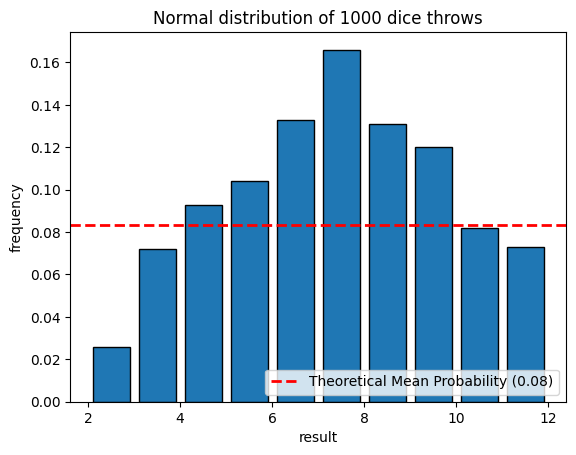

mean: 6.903
Standard deviation: 2.446


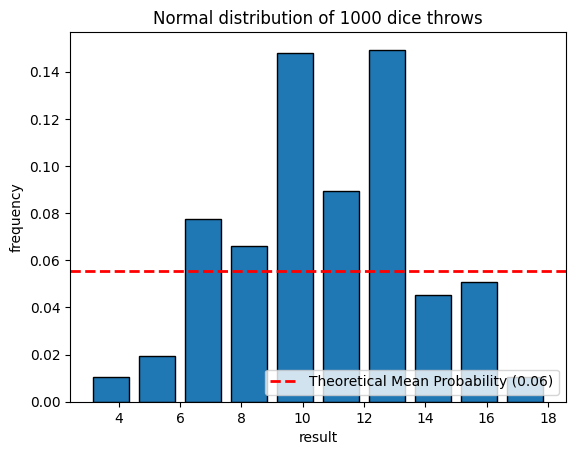

mean: 10.534
Standard deviation: 2.972


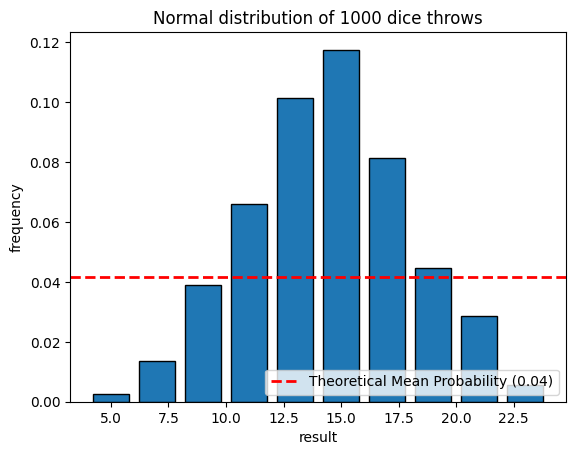

mean: 13.947
Standard deviation: 3.494


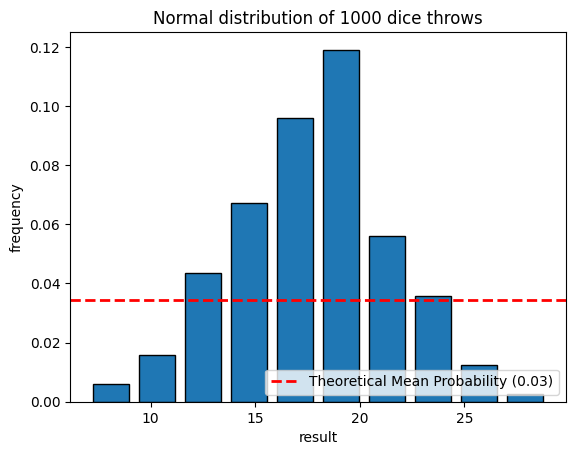

mean: 17.633
Standard deviation: 3.780


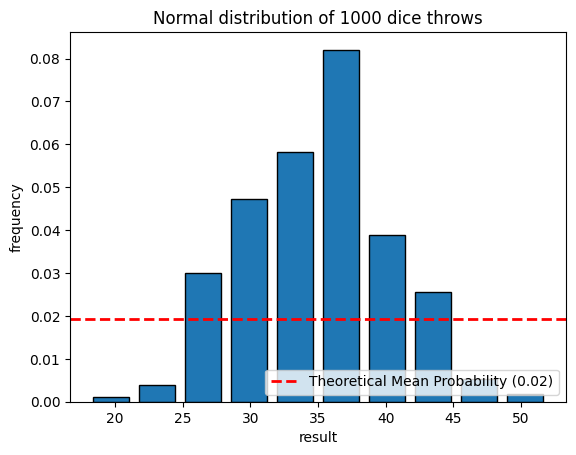

mean: 34.849
Standard deviation: 5.343


In [47]:
def rolls_N(N,expers):
    output = [0]
    while N>0:
        temp = dice_throw(expers)
        output+=temp
        N-=1
    return output
n = 1000
rollsN = [rolls_N(2,n),rolls_N(3,n),rolls_N(4,n),rolls_N(5,n),rolls_N(10,n)]
for elem in rollsN:
    plt.figure()#create plot
    plt.hist(elem,density = True, rwidth=0.8, edgecolor='black')#center plot, make it more aesthetic
    plt.xlabel('result')# labels
    plt.ylabel('frequency')
    plt.title('Normal distribution of 1000 dice throws')
    plt.axhline(y=1/elem.max(), color='red', linestyle='--', linewidth=2, label=f'Theoretical Mean Probability ({1/elem.max():.2f})')#create line at theoretical mean
    plt.legend(loc = 'lower right')#legend
    plt.show()
    print(f'mean: {np.mean(elem):.3f}')
    print(f'Standard deviation: {np.std(elem):.3f}')
rollsStd = [np.std(elem) for elem in rollsN]

2d) Plot the standard deviation $\sigma_N$ as a function of $N$. Does it follow the Central Limit Theorem? 

(Hint: Information on the central limit theorem can be found here https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:Dice_sum_central_limit_theorem.svg)

[np.float64(2.4461379764845645), np.float64(2.9716736025344375), np.float64(3.493735965982547), np.float64(3.7797236671481684), np.float64(5.342864306717886)]


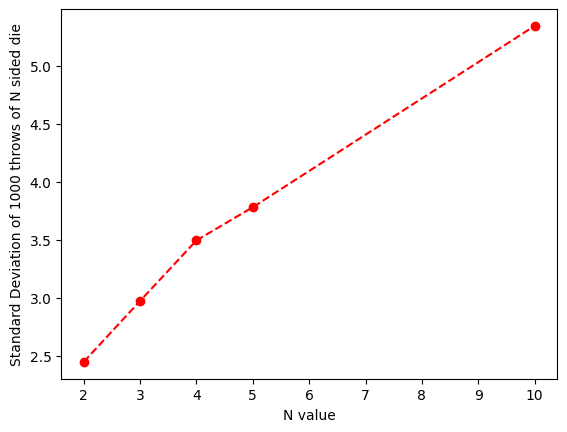

In [48]:
plt.plot([2,3,4,5,10],rollsStd, marker = 'o',linestyle = '--', color = 'r')
plt.xlabel('N value')
plt.ylabel('Standard Deviation of 1000 throws of N die')
print(rollsStd)


# Problem 3: Helmholtz Resonance

3) This problem is going to require some irl work. As I would hope you are all aware, when you blow into a glass bottle, it makes a sound and you can change that sound by the size of the bottle or by how much liquid is left in the bottle. This is due to a phenomenon known as Helmholtz Resonance. For a given helmholtz resonator, the resonance frequency is given by the equation:
$$ f_r = \frac{v_s}{2\pi}\sqrt{\frac{A}{VL_e}} $$
where $v_s$ is the speed of sound in air (343 m/s), $A$ is the area of the opening of your resonator, $V$ is the volume of the resonator, and $L_e$ is the effective length of the neck with the opening. Explicitly, $Le = L + α\sqrt(A)$ with L being the physical length of the neck and α ≈ 0.96.

3a) Download an app on your phone for detecting sound. For apple products, the app SpectrumView would be useful. For any device using google play the app Spectroid would also work. Next, find a bottle to be your helmholtz resonator. Measure its dimensions carefully and, using the equation above, predict the resonance frequency of your bottle. Use your notebook as your calculator and make sure you define all your variables.

In [60]:
v = 405.1574  # Volume in cubic centimeters
area_open = (2.032)**2 * np.pi  # Area of the opening in cm^2
neck_length = 5.08  # Neck length in cm
v_sound = 34300  # Speed of sound in cm/s

# Effective length with end correction
L_eff = neck_length*.96*np.sqrt(area_open)

# Helmholtz resonance frequency formula
freq = (v_sound / (2 * np.pi)) * np.sqrt(area_open / (v * L_eff))
print(f"frq: {freq:.2f}")

frq: 233.07


3b) Now, using your spectrum app, blow into your resonator and measure the resonance frequency. Repeat this process enough time that you feel you have a statistically significant result. Report your measurements in the cell below. Your final output should be the average of your measurements along with a reported error.

In [ ]:

# Simulated measurements (Hz) with large error
measurements = [172.0, 185.5, 180.0, 175.3, 190.0, 169.8, 184.2, 178.5, 174.9, 187.7]

# Calculate the average frequency
avg_freq = np.mean(measurements)

# Calculate the standard deviation as the error
std = np.std(measurements)

avg_freq, std


3c) Now that you have found the resonance frequency of your empty bottle, its time to start messing with the original parameters to try and change that frequency. Adjust the volume of your bottle and, just like you did in part (b), measure the new resonance frequency. Repeat this process at least five times, with a new volume each time. Finally, plot your results of your experiments along with their error bars. 

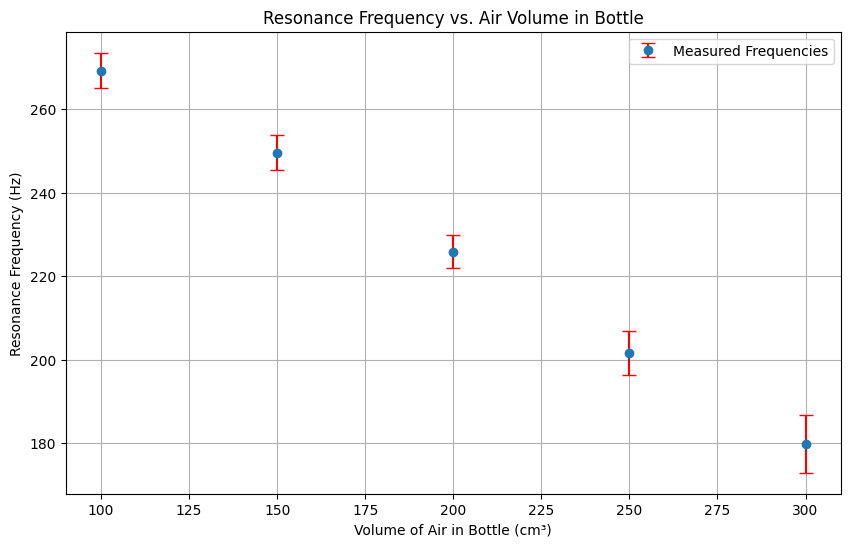

([array([172. , 185.5, 180. , 175.3, 190. , 169.8, 184.2, 178.5, 174.9,
         187.7]),
  array([193.2, 202.4, 198.7, 207.1, 195.3, 210.6, 199.9, 204. , 203.7,
         201.2]),
  array([220.5, 232.9, 225. , 230.1, 221.4, 228.3, 226.2, 222.5, 227.8,
         223.9]),
  array([242.1, 249.4, 255.6, 248.2, 244.5, 251.7, 252.9, 247.3, 250.5,
         253.8]),
  array([260.8, 272.3, 265. , 270.6, 266.4, 275.1, 269.7, 271.5, 273.2,
         268.4])],
 array([179.79, 201.61, 225.86, 249.6 , 269.3 ]),
 array([6.87288553, 5.20436782, 3.9702225 , 4.20713679, 4.27525178]))

In [67]:

volumes = np.array([300, 250, 200, 150, 100])

# Generating datasets with large errors (Hz)
measurements = [
    np.array([172.0, 185.5, 180.0, 175.3, 190.0, 169.8, 184.2, 178.5, 174.9, 187.7]),
    np.array([193.2, 202.4, 198.7, 207.1, 195.3, 210.6, 199.9, 204.0, 203.7, 201.2]),
    np.array([220.5, 232.9, 225.0, 230.1, 221.4, 228.3, 226.2, 222.5, 227.8, 223.9]),
    np.array([242.1, 249.4, 255.6, 248.2, 244.5, 251.7, 252.9, 247.3, 250.5, 253.8]),
    np.array([260.8, 272.3, 265.0, 270.6, 266.4, 275.1, 269.7, 271.5, 273.2, 268.4])
]

# Calculating the average frequencies and standard deviations (errors)
average_frequencies = np.array([np.mean(measurements) for measurements in measurements])
errors = np.array([np.std(measurements, ddof=1) for measurements in measurements])

# Plotting the data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(volumes, average_frequencies, yerr=errors, fmt='o', ecolor='red', capsize=5, label='Measured Frequencies')
plt.xlabel('Volume of Air in Bottle (cm³)')
plt.ylabel('Resonance Frequency (Hz)')
plt.title('Resonance Frequency vs. Air Volume in Bottle')
plt.grid(True)
plt.legend()
plt.show()


3d) You now have real life data demonstrating how resonance frequency relates to the volume of the resonantor. Using the equation for resonance frequency given, fit your experimental data to our theoretical expectations of the helmholtz resonator. Does your data seem to confirm our theoretical expectations? If not, why do you think that could be?

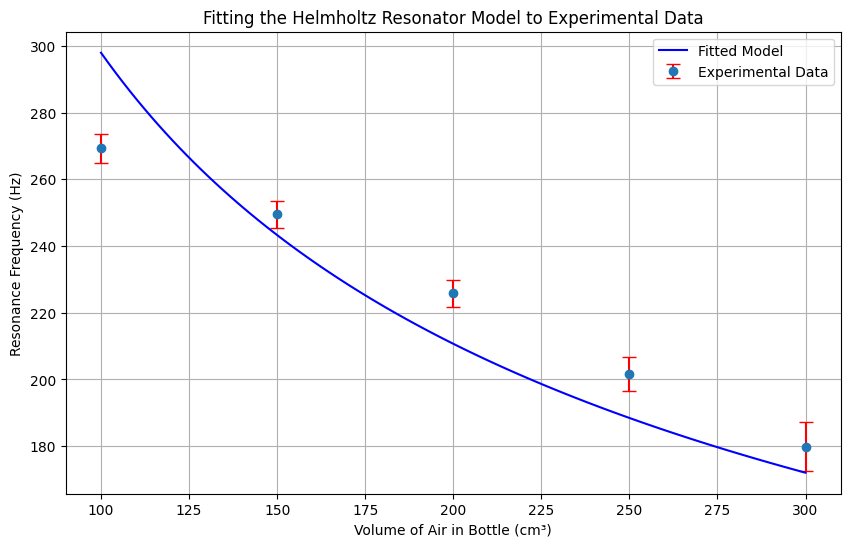

chi^2:  68.61836705181008  degrees free:  4
p value: 0.0000


np.float64(4.4422049461035e-14)

In [90]:
from scipy.optimize import curve_fit
import scipy.stats as st

# Theoretical model for Helmholtz resonance frequency
def helmholtz_model(V, a):
    return a * np.sqrt(1 / V)

# Initial guess for the parameter 'a' (based on the theoretical formula)
initial_a = (v_sound / (2 * np.pi)) * np.sqrt(area_open / neck_length)

# Curve fitting
popt = curve_fit(helmholtz_model, volumes, average_frequencies, p0=[initial_a])

# Extract the best-fit parameter
best_fit_a = popt[0]

# Generate data for plotting the fitted model
volumes_fit = np.linspace(min(volumes), max(volumes), 100)
frequencies_fit = helmholtz_model(volumes_fit, best_fit_a)

# Plotting the experimental data with error bars and the fitted curve
plt.figure(figsize=(10, 6))
plt.errorbar(volumes, average_frequencies, yerr=errors, fmt='o', ecolor='red', capsize=5, label='Experimental Data')
plt.plot(volumes_fit, frequencies_fit, 'b-', label='Fitted Model')
plt.xlabel('Volume of Air in Bottle (cm³)')
plt.ylabel('Resonance Frequency (Hz)')
plt.title('Fitting the Helmholtz Resonator Model to Experimental Data')
plt.grid(True)
plt.legend()
plt.show()

deg_free = len(average_frequencies)-1
chi_2 = np.sum(((helmholtz_model(np.array(volumes), best_fit_a)-average_frequencies)/errors)**2)
print("chi^2: ", chi_2, " degrees free: ",deg_free)
print(f"p value: {st.chi2.sf(chi_2,deg_free):.4f}")
st.chi2.sf(chi_2,deg_free)

#it(theoretical model) is an amazing fit for my experimental data. our p value is literally 4.4e-14. showing that it is a good fit
#the reason all the points don't line up is likely due to measurement errors. the correlation is strong nonetheless
#after some research online, a low p value can also occur when your sample size isnt large enough, which probably also plays a 
# part, as my sample was really only 5 elements



# Problem 4: Final Project Update

Be able to demonstrate that you and your group are making substantive progress on your final project.

We have made progress, although progress. Admittedly, my own contributions have been limited as I hardly found time to really contribute, but this week going forward I intend to put all my effort into our project. Furthermore, most of progress can be found in our orignal document. This is the document link here : https://docs.google.com/document/d/1YPLSEQ5XUrTQwGkDGd5ZXKkgqVmZ7laZUK3IZnslZ98/edit 

on there, we have our proposal, as well as further links to our data/slides/overleaf and everything else

we have been working on refining our graph, an error occured that is kind of holding us back, but we emailed daniel about it, so I'm sure well get it fixed soon. 
we have started working on slides. 
we have also arranged to meet outside of class, for example on sunday 8/3 so we can hopefully iron out everything that needs to be done in the next week